# Librerias

In [ ]:
import requests
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Descarga de las stopwords en inglés y español

nltk.download('stopwords')
stopwords_en = set(stopwords.words("english"))
stopwords_esp = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Libros

In [ ]:
# Crime and Punishment // El crimen y el castigo

url_1 = "https://www.gutenberg.org/cache/epub/2554/pg2554-images.html" # en inglés
url_2 = "https://www.gutenberg.org/cache/epub/61851/pg61851-images.html" # en español

# Web Scraping


In [ ]:
contenido_ingles = requests.get(url_1).text
contenido_esp = requests.get(url_2).text

In [ ]:
soup_ingles = BeautifulSoup(contenido_ingles, "html.parser")
soup_esp = BeautifulSoup(contenido_esp, "html.parser")

In [ ]:
texto_ingles = soup_ingles.get_text()
texto_esp = soup_esp.get_text()

In [ ]:
def limpiar_texto_ing(texto):

  texto_minuscula = texto.lower() # Se convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # Se eliminan todos los signos de puntuación

  lista_palabras = texto_sin_puntuacion.split() # Se divide el texto en palabras individuales

  palabras_importantes = [] # Creación de lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in stopwords_en:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
# Misma función para el texto en español

def limpiar_texto_esp(texto):

  texto_minuscula = texto.lower()

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)

  lista_palabras = texto_sin_puntuacion.split()

  palabras_importantes = []

  for palabra in lista_palabras:
    if palabra not in stopwords_esp:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
# Limpiado de texto

palabras_limpias_ing = limpiar_texto_ing(texto_ingles)
palabras_limpias_esp = limpiar_texto_esp(texto_esp)

texto_limpio_ing = ' '.join(palabras_limpias_ing)
texto_limpio_esp = ' '.join(palabras_limpias_esp)

In [ ]:
# Generando los wordclouds

wordcloud_ing = WordCloud(width=1200, height=800, background_color='white', colormap = "tab20").generate(texto_limpio_ing)
wordcloud_esp = WordCloud(width=1200, height=800, background_color='white', colormap = "tab20b").generate(texto_limpio_esp)

(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

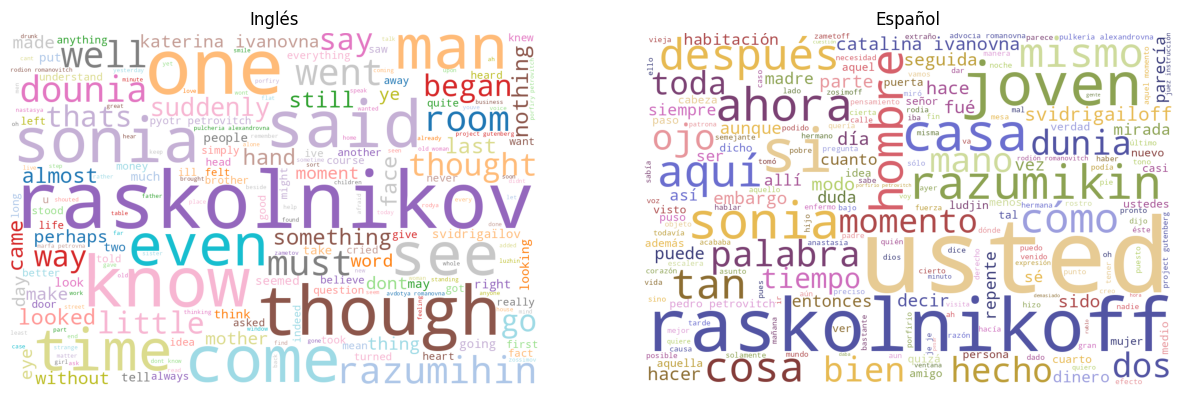

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.imshow(wordcloud_ing)
ax1.set_title("Inglés")
ax1.axis("off")
ax2.imshow(wordcloud_esp)
ax2.set_title("Español")
ax2.axis("off")

# Limpiado con Spacy

## Descarga e importación de librerias y stopwords

In [ ]:
!pip install spacy -q

In [ ]:
# Descarga de ambos modelos de lenguaje

!python -m spacy download en_core_web_lg -q
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from collections import Counter

In [ ]:
# Carga de los modelos de lenguaje

nlp_en = spacy.load("en_core_web_lg")
nlp_esp = spacy.load("es_core_news_lg")

import en_core_web_lg
import es_core_news_lg

nlp_en = en_core_web_lg.load()
nlp_esp = es_core_news_lg.load()

# Esto aumenta el valor default de máximo de caracteres (1.000.000). Es necesario ya que ambos textos lo superan

nlp_en.max_length = 1400000
nlp_esp.max_length = 1100000

In [ ]:
len(texto_ingles)

1303009

In [ ]:
# Inicialización de los objetos doc

doc_en = nlp_en(texto_ingles)
doc_esp = nlp_esp(texto_esp)

In [ ]:
# Filtración y lematización para ambos textos

en_filtrado = [token.lemma_.lower() for token in doc_en if token.is_alpha and not token.is_stop]
esp_filtrado = [token.lemma_.lower() for token in doc_esp if token.is_alpha and not token.is_stop]

In [ ]:
# Obteniendo las palabras más frecuentes

frecuencia_palabras_en = Counter(en_filtrado)
frecuencia_palabras_esp = Counter(esp_filtrado)

In [ ]:
spacy_ing = WordCloud(width=1200, height=800, background_color='white', colormap = "tab20").generate_from_frequencies(frecuencia_palabras_en)
spacy_esp = WordCloud(width=1200, height=800, background_color='white', colormap = "tab20b").generate_from_frequencies(frecuencia_palabras_esp)

(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

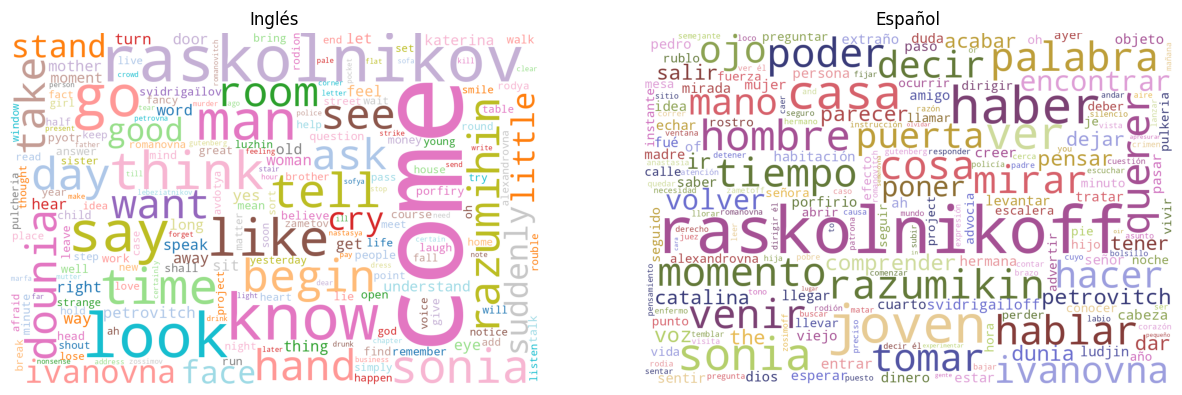

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.imshow(spacy_ing)
ax1.set_title("Inglés")
ax1.axis("off")
ax2.imshow(spacy_esp)
ax2.set_title("Español")
ax2.axis("off")